포함되어야 할 것

##1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답
#### 지역은 어떻게 구분했는가
#### 지역별로 선호하는 게임의 장르를 파악했는가
#### 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각하는가

##2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답
####트렌드는 어떤 것을 기준으로 파악했는가
#### 연도별로 트렌드가 존재하나
#### 왜 존재하는지/존재하지 않는지 생각하는가

##3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 한다
#### 인기가 많다는것을 어떻게 정의했는가
#### 해당 게임이 왜 인기가 많다고 생각했나
#### 시각화를 통해 무엇을 나타내고자 하는지 고려했는가
#### 해당 분석을 통해 어떤 인사이트를 도출할 수 있는가

##4. 다음 분기엔 어떤 게임을 설계해야 하는가에 대한 결론
#### 다음 분기가 언제인가
#### 회사의 규모는 어느정도인가 같은 디테일한 설정과 왜 이러한 결론을 도출했는지 고민.

##(추가조건) 5. 이 중 한개를 만족
##### 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가
##### 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가
##### 제공된 데이터셋 외에 추가 데이터를 사용하였는가
##### 통계적 기법을 활용한 가설 검정을 진행하였는가
##### 완성도 높은 시각화를 보여주었는가 - 가독성, 목적성이 잘 드러나는 시각화



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('vgames2.csv', sep=',')
df = df.drop(['Unnamed: 0'], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()
# 결측치 379개

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
null_rows = df[df.isnull().any(axis=1)]
null_rows.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2552,The Golden Compass,PSP,NaN,Action,Sega,0.11,160K,0,0.1
12331,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14
12340,Virtual Chess 64,N64,1998.0,NaN,Titus,0.05,0.01,0,0
10223,Demolition Company: Gold Edition,PC,2011.0,Simulation,NaN,0,0.02,0,0
6512,Happy Feet Two,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.07,0.01,0,0.01
15077,Myth Makers: Super Kart GP,Wii,2007.0,NaN,Popcorn Arcade,0.01,0,0,0
3841,Street Hoops,GC,NaN,Sports,Unknown,0.09,0.02,0,0
11050,Puppy Palace,DS,2008.0,NaN,Ubisoft,0.35,0,0,0.03
12703,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,Vivendi Games,0.18,0.14,0,0.06
4238,Rock Revolution,Wii,NaN,Misc,Unknown,0.07,0,0,0.01


In [ ]:
# 각 'Sales' 컬럼들에서 'M' 과 'K'가 포함된 행의 갯수
count1 = df['NA_Sales'].str.contains('M|K').sum()
count2= df['EU_Sales'].str.contains('M|K').sum()
count3 = df['JP_Sales'].str.contains('M|K').sum()
count4 = df['Other_Sales'].str.contains('M|K').sum()

print(count1+count2+count3+count4)

799


In [ ]:
sales_containing_K = df[df['NA_Sales'].str.contains('K')]
sales_containing_K

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [ ]:
df = df.dropna(axis=0)

In [ ]:
# 각 'Sales' 컬럼들에서 'M'과 'K'가 포함된 행을 제거
drop_values = ['M','K']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
15472,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
15473,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15474,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15476 entries, 0 to 15475
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15476 non-null  object 
 1   Platform     15476 non-null  object 
 2   Year         15476 non-null  float64
 3   Genre        15476 non-null  object 
 4   Publisher    15476 non-null  object 
 5   NA_Sales     15476 non-null  float64
 6   EU_Sales     15476 non-null  float64
 7   JP_Sales     15476 non-null  float64
 8   Other_Sales  15476 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [ ]:
df[df['Year']<1000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
67,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
74,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
198,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
282,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
727,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
14773,Theatrhythm Dragon Quest,3DS,15.0,Misc,Square Enix,0.00,0.00,0.15,0.00
14916,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00
15023,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00,0.00
15062,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05


In [ ]:
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15472,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
15473,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15474,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
15471,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
15472,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15473,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15474,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000,15476.000000
mean,2006.403851,0.263680,0.146372,0.077810,0.048344,0.536206
std,5.834873,0.824188,0.510354,0.309821,0.192612,1.570285
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.472500
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df_genre = df.groupby(by=['Genre'])['Total_Sales'].sum() # 모든 지역에서 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 지역에서 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 지역에서 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 지역에서 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df.groupby(by=['Genre'])['Other_Sales'].sum() # 기타 지역에서 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

In [ ]:
# 모든 지역에서의 총 판매량 순위
df_genre.sort_values('Total_Sales', ascending=False)

,Genre,Total_Sales
0,Action,1619.59
10,Sports,1241.05
8,Shooter,975.46
7,Role-Playing,836.13
4,Platform,770.59
3,Misc,751.42
6,Racing,684.01
2,Fighting,422.44
9,Simulation,372.47
5,Puzzle,237.39


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

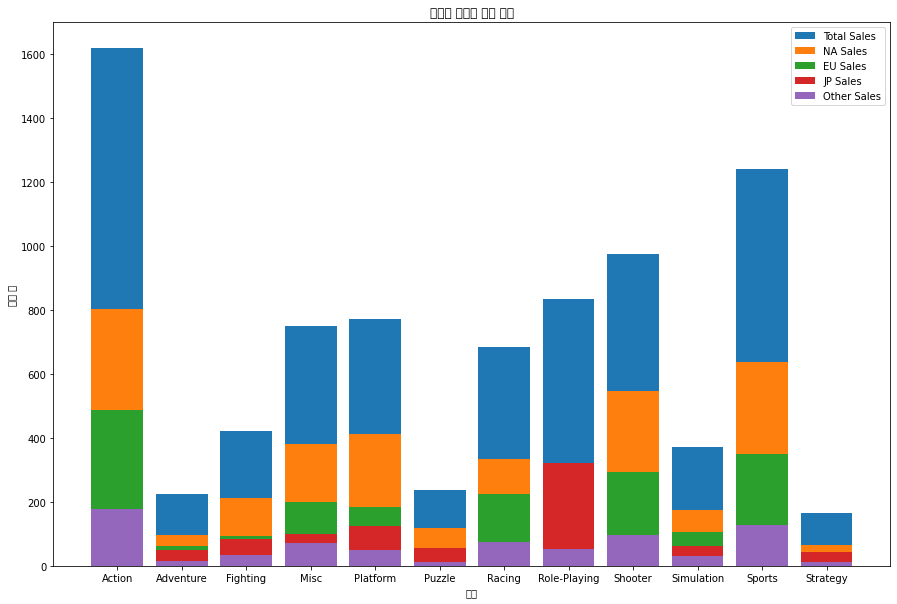

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(df_genre.index, df_genre['Total_Sales'], label='Total Sales')
plt.bar(df_genre_na['Genre'], df_genre_na['NA_Sales'], label='NA Sales')
plt.bar(df_genre_eu['Genre'], df_genre_eu['EU_Sales'], label='EU Sales')
plt.bar(df_genre_jp['Genre'], df_genre_jp['JP_Sales'], label='JP Sales')
plt.bar(df_genre_ot['Genre'], df_genre_ot['Other_Sales'], label='Other Sales')

plt.xlabel('장르')
plt.ylabel('판매 수')
plt.title('지역별 장르별 판매 추이')
plt.legend()

plt.show()

In [ ]:
genre_sales = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()

bestgenre_per_yer = genre_sales.loc[genre_sales.groupby('Year')['Total_Sales'].idxmax()].reset_index()

bestgenre_per_yer = pd.DataFrame(bestgenre_per_yer[['Year', 'Genre']])

bestgenre_per_yer

,Year,Genre
0,1980,Shooter
1,1981,Action
2,1982,Puzzle
3,1983,Platform
4,1984,Shooter
5,1985,Platform
6,1986,Action
7,1987,Fighting
8,1988,Platform
9,1989,Puzzle


<AxesSubplot:xlabel='Year', ylabel='Total_Sales'>

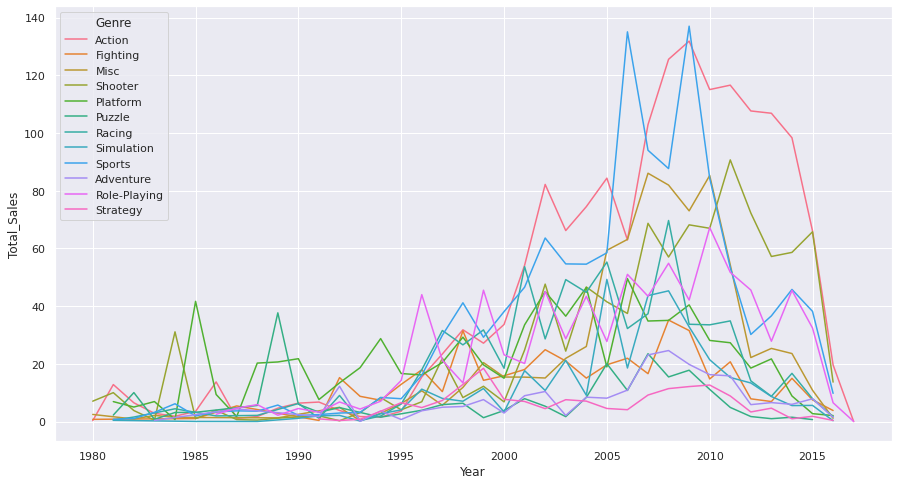

In [ ]:
# lineplot 그리기
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=genre_sales, ci=None)

In [ ]:
before2000 = genre_sales[genre_sales['Year'] <= 2000]
after2000 = genre_sales[genre_sales['Year'] > 2000]

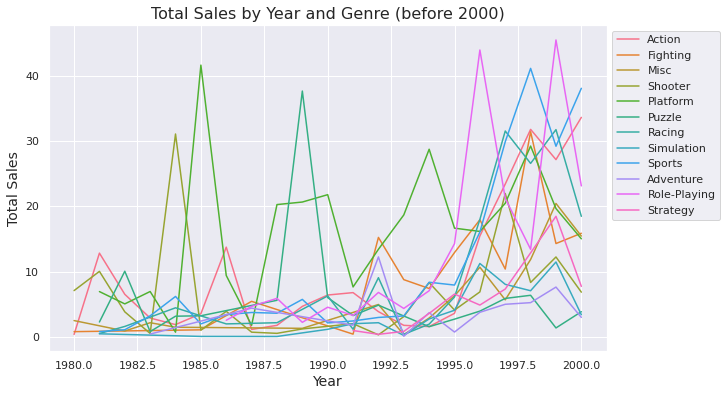

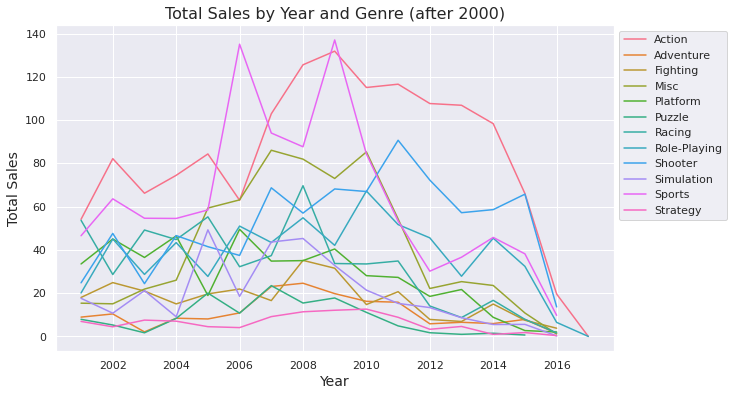

In [ ]:
# 2000년 이전 데이터 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=before2000, ci=None, ax=ax1)
ax1.set_title('Total Sales by Year and Genre (before 2000)', fontsize=16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Total Sales', fontsize=14)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 2000년 이후 데이터 그리기
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=after2000, ci=None, ax=ax2)
ax2.set_title('Total Sales by Year and Genre (after 2000)', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Total Sales', fontsize=14)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

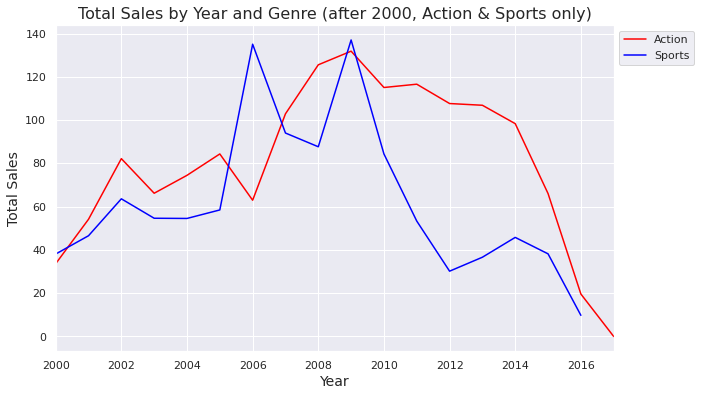

In [ ]:
# 2000년 이후 데이터에서 Action과 Sports 장르 데이터 추출
after2000_A_S = genre_sales[(genre_sales['Year'] >= 2000) & ((genre_sales['Genre'] == 'Action') | (genre_sales['Genre'] == 'Sports'))]

# 그래프 그리기
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,6)})
sns.lineplot(x='Year', y='Total_Sales', hue='Genre', data=after2000_A_S, ci=None, palette={'Action':'red','Sports':'blue'})
plt.title('Total Sales by Year and Genre (after 2000, Action & Sports only)', fontsize=16)
plt.xlim([2000,2017])
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Platform', 'Total_Sales']]
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Platform,Total_Sales
0,Wii Sports,2006,Sports,Wii,82.74
1,Super Mario Bros.,1985,Platform,NES,40.24
2,Mario Kart Wii,2008,Racing,Wii,35.83
3,Wii Sports Resort,2009,Sports,Wii,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,GB,31.38
5,Tetris,1989,Puzzle,GB,30.26
6,New Super Mario Bros.,2006,Platform,DS,30.01
7,Wii Play,2006,Misc,Wii,29.01
8,New Super Mario Bros. Wii,2009,Platform,Wii,28.61
9,Duck Hunt,1984,Shooter,NES,28.31


In [ ]:
df[df['Name'].str.contains('Super Mario')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
581,Super Mario Strikers,GC,2005,Sports,Nintendo,0.98,0.38,0.20,0.04,1.60
1242,Super Mario Advance,GBA,2001,Platform,Nintendo,3.14,1.24,0.91,0.20,5.49
2800,Classic NES Series: Super Mario Bros.,GBA,2004,Platform,Nintendo,0.00,0.00,1.39,0.03,1.42
2831,Super Mario World 2: Yoshi's Island,GBA,2002,Platform,Nintendo,1.75,0.45,0.62,0.09,2.91
2834,Super Mario All-Stars,SNES,1993,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
3943,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4317,Super Mario All-Stars: Limited Edition,Wii,2010,Platform,Nintendo,1.02,0.52,0.92,0.14,2.60
5674,Puzzle & Dragons Z + Super Mario Bros. Edition,3DS,2015,Puzzle,Nintendo,0.05,0.05,0.34,0.01,0.45
6415,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
6499,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


In [ ]:
df[df['Name'].str.contains('Grand Theft Auto')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
721,Grand Theft Auto: Liberty City Stories,PSP,2005,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72
756,Grand Theft Auto: Vice City Stories,PS2,2007,Action,Take-Two Interactive,0.78,0.03,0.03,0.13,0.97
1892,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
1956,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04
3239,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003,Action,Take-Two Interactive,0.85,0.66,0.00,0.22,1.73
3270,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
3409,Grand Theft Auto: San Andreas,X360,2008,Action,Take-Two Interactive,0.08,0.03,0.00,0.01,0.12
4940,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003,Action,Take-Two Interactive,1.84,0.56,0.00,0.09,2.49
4986,Grand Theft Auto: Liberty City Stories,PS2,2006,Action,Take-Two Interactive,1.56,1.40,0.07,0.50,3.53
5006,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15


In [ ]:
df[df['Name'].str.contains('Pokemon')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
236,Pokemon Trozei!,DS,2005,Puzzle,Nintendo,0.26,0.00,0.31,0.02,0.59
1182,Pokemon Conquest,DS,2012,Role-Playing,Nintendo,0.58,0.06,0.37,0.04,1.05
1354,Pokemon Art Academy,3DS,2014,Misc,Nintendo,0.18,0.12,0.16,0.03,0.49
1711,Pokemon Rumble Blast,3DS,2011,Action,Nintendo,0.47,0.26,0.35,0.07,1.15
1814,Pokemon Mystery Dungeon: Explorers of Sky,DS,2009,Role-Playing,Nintendo,0.58,0.44,0.44,0.12,1.58
2559,Pokemon Pinball,GB,1999,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
3842,Pokemon Ranger: Guardian Signs,DS,2010,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.32
3992,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
4515,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
5168,Pokemon Ranger: Shadows of Almia,DS,2008,Role-Playing,Nintendo,0.95,0.54,0.62,0.18,2.29


In [ ]:
df[df['Name'].str.contains('NBA')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
63,NBA 2K11,PC,2010,Action,Take-Two Interactive,0.18,0.00,0.00,0.01,0.19
183,NBA 2K17,X360,2016,Sports,Take-Two Interactive,0.04,0.00,0.00,0.01,0.05
223,NBA Street V3,PS2,2005,Sports,Electronic Arts,0.52,0.41,0.00,0.14,1.07
251,NBA 2K12,PSP,2011,Sports,Take-Two Interactive,0.22,0.03,0.00,0.03,0.28
321,NBA 2K12,X360,2011,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16,2.62
...,...,...,...,...,...,...,...,...,...,...
15029,NBA Live 2004,PS2,2003,Sports,Electronic Arts,1.57,0.18,0.00,0.27,2.02
15069,NBA In The Zone '98,N64,1997,Sports,Konami Digital Entertainment,0.25,0.02,0.00,0.00,0.27
15077,NBA 2K17,PS3,2016,Sports,Take-Two Interactive,0.03,0.01,0.00,0.01,0.05
15311,Kobe Bryant in NBA Courtside,N64,1998,Sports,Nintendo,1.02,0.13,0.04,0.01,1.20


In [ ]:
df[df['Name'].str.contains('FIFA')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
36,FIFA World Cup Germany 2006,XB,2006,Sports,Electronic Arts,0.18,0.05,0.00,0.01,0.24
130,FIFA Manager 12,PC,2011,Sports,Electronic Arts,0.00,0.03,0.00,0.01,0.04
170,FIFA Soccer,PSP,2005,Sports,Electronic Arts,0.11,0.00,0.00,0.01,0.12
193,FIFA Street 2,GC,2006,Sports,Electronic Arts,0.09,0.02,0.00,0.00,0.11
268,FIFA Soccer 2005,GC,2004,Sports,Electronic Arts,0.11,0.03,0.00,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...
14946,FIFA Soccer 06,PSP,2005,Sports,Electronic Arts,0.10,0.01,0.00,0.01,0.12
15031,FIFA Soccer 64,N64,1997,Sports,Electronic Arts,0.16,0.30,0.00,0.03,0.49
15162,FIFA 12,PSP,2011,Sports,Electronic Arts,0.12,0.26,0.02,0.14,0.54
15235,FIFA 17,XOne,2016,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53


In [ ]:
# 각 시리즈별 전 세계 총 판매량 계산
mario_sales = df[df['Name'].str.contains('Super Mario')]['Total_Sales'].sum()
pokemon_sales = df[df['Name'].str.contains('Pokemon')]['Total_Sales'].sum()
gta_sales = df[df['Name'].str.contains('Grand Theft Auto')]['Total_Sales'].sum()
NBA_sales = df[df['Name'].str.contains('NBA')]['Total_Sales'].sum()
FIFA_sales = df[df['Name'].str.contains('FIFA')]['Total_Sales'].sum()

# 결과 출력
print(f"Super Mario 시리즈의 전 세계 총 판매량: {mario_sales:.2f}")
print(f"Pokemon 시리즈의 전 세계 총 판매량: {pokemon_sales:.2f} ")
print(f"gta 시리즈의 전 세계 총 판매량: {gta_sales:.2f} ")
print(f"NBA 시리즈의 전 세계 총 판매량: {NBA_sales:.2f} ")
print(f"FIFA 시리즈의 전 세계 총 판매량: {FIFA_sales:.2f} ")

Super Mario 시리즈의 전 세계 총 판매량: 290.93
Pokemon 시리즈의 전 세계 총 판매량: 177.60 
gta 시리즈의 전 세계 총 판매량: 144.25 
NBA 시리즈의 전 세계 총 판매량: 118.57 
FIFA 시리즈의 전 세계 총 판매량: 156.06 


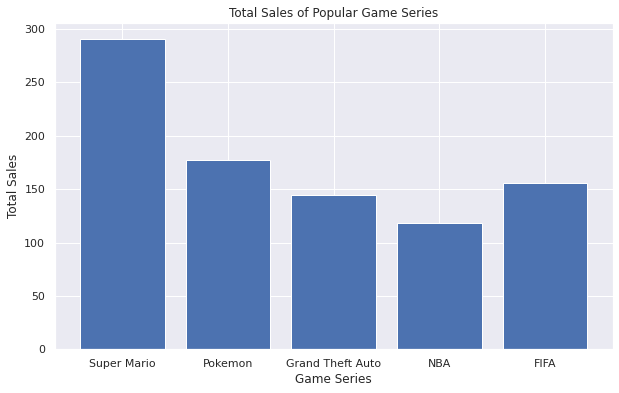

In [ ]:
sales_data = {'Super Mario': mario_sales, 'Pokemon': pokemon_sales, 'Grand Theft Auto': gta_sales, 'NBA': NBA_sales, 'FIFA': FIFA_sales}
plt.bar(sales_data.keys(), sales_data.values())
plt.title('Total Sales of Popular Game Series')
plt.xlabel('Game Series')
plt.ylabel('Total Sales')
plt.show()

Text(0, 0.5, 'Total Sales')

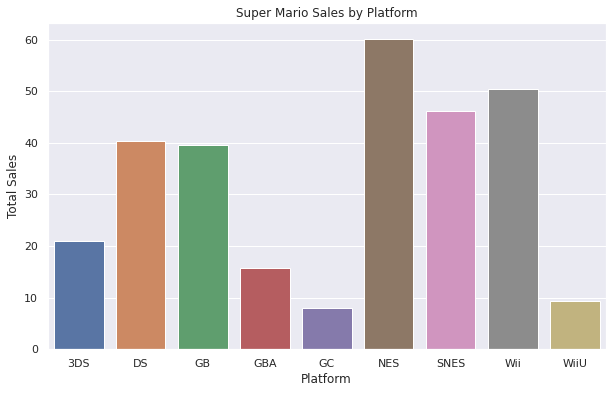

In [ ]:
mario = df[df['Name'].str.contains('Super Mario')]

mario_platform = mario.groupby('Platform')['Total_Sales'].sum().reset_index()

sns.barplot(x='Platform', y='Total_Sales', data=mario_platform)
plt.title('Super Mario Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')

In [ ]:
df[df['Name'].str.contains('Super Mario')].sort_values('Year',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5674,Puzzle & Dragons Z + Super Mario Bros. Edition,3DS,2015,Puzzle,Nintendo,0.05,0.05,0.34,0.01,0.45
7334,Super Mario 3D World,WiiU,2013,Platform,Nintendo,2.11,1.11,0.72,0.30,4.24
9691,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83
12094,New Super Mario Bros. U,WiiU,2012,Platform,Nintendo,2.32,1.30,1.27,0.31,5.20
11792,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
15400,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
4317,Super Mario All-Stars: Limited Edition,Wii,2010,Platform,Nintendo,1.02,0.52,0.92,0.14,2.60
15415,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
11595,Super Mario Galaxy,Wii,2007,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
6499,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01


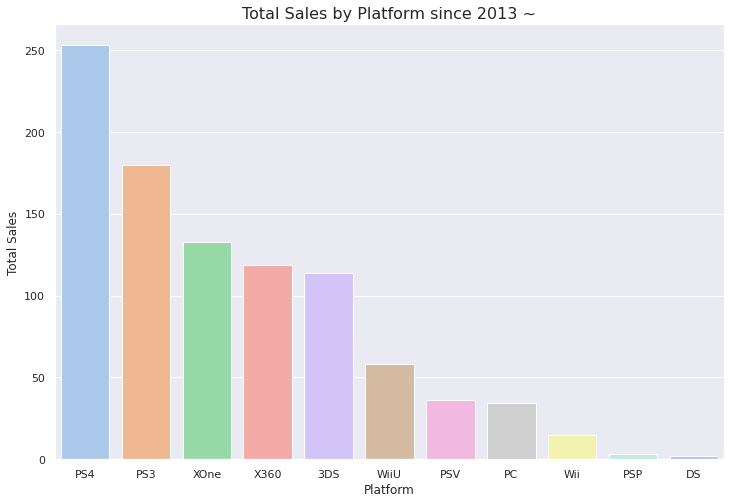

In [ ]:
df_2010 = df[df['Year'] >= 2013]
platform_sales = df_2010.groupby('Platform')['Total_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='Total_Sales', ascending=False)

sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Platform', y='Total_Sales', data=platform_sales, palette='pastel')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Total Sales by Platform since 2013 ~', fontsize=16)
plt.show()

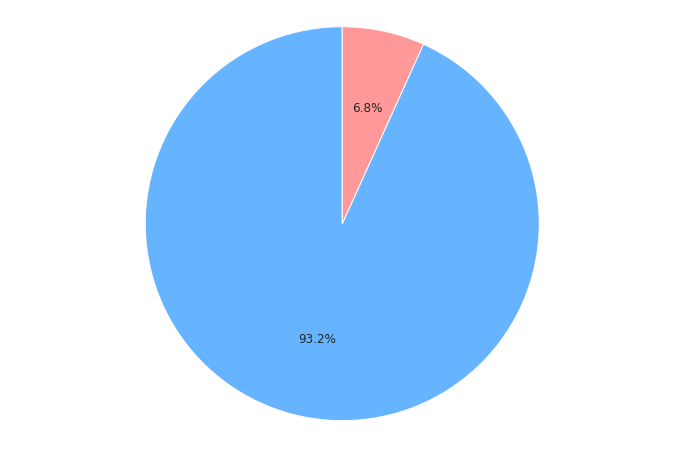

In [ ]:
used_data = 15476
total_data = 16598
unused_data = total_data - used_data

sizes = [used_data, unused_data]
colors = ['#66b3ff', '#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.show()